<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA012-FrameworksIA/blob/main/Exercicio2_Frameworks_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 2


In [ ]:
#importação das bibliotecas

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras import backend
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [ ]:
# verificando a versao do tensorflow
tf.__version__

'2.17.1'

In [ ]:
# importação dos dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, delimiter=';')

data.columns = [
'acidez_fixa', # fixed acidity
'acidez_volatil', # volatile acidity
'acido_citrico', # citric acid
'acucar_residual', # residual sugar
'cloretos', # chlorides
'dioxido_de_enxofre_livre', # free sulfur dioxide
'dioxido_de_enxofre_total', # total sulfur dioxide
'densidade', # density
'pH', # pH
'sulfatos', # sulphates
'alcool', # alcohol
'score_qualidade_vinho' # quality
]



In [ ]:
# prompt: mostre quantos registro de cada categoria tem no dataser

data['score_qualidade_vinho'].value_counts()

,count
score_qualidade_vinho,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
# prompt: summary do dataframe

# Display a summary of the DataFrame
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acidez_fixa               1599 non-null   float64
 1   acidez_volatil            1599 non-null   float64
 2   acido_citrico             1599 non-null   float64
 3   acucar_residual           1599 non-null   float64
 4   cloretos                  1599 non-null   float64
 5   dioxido_de_enxofre_livre  1599 non-null   float64
 6   dioxido_de_enxofre_total  1599 non-null   float64
 7   densidade                 1599 non-null   float64
 8   pH                        1599 non-null   float64
 9   sulfatos                  1599 non-null   float64
 10  alcool                    1599 non-null   float64
 11  score_qualidade_vinho     1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       acidez_fixa  acidez_volatil  acido_citrico  acucar_residua

In [ ]:
#normalizando o score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['score_qualidade_vinho_norm'] = scaler.fit_transform(data[['score_qualidade_vinho']])

print(data[['score_qualidade_vinho', 'score_qualidade_vinho_norm']].head())

   score_qualidade_vinho  score_qualidade_vinho_norm
0                      5                         0.4
1                      5                         0.4
2                      5                         0.4
3                      6                         0.6
4                      5                         0.4


In [ ]:
X = data.iloc[:,0:-1].astype(float)
Y = data.iloc[:,-1].astype(float)

In [ ]:
# separação em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
# criação do modelo - 3 camadas
i = tf.keras.layers.Input(shape=(12, ))
x = tf.keras.layers.Dense(50, activation='relu')(i)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.models.Model(i, x)

In [ ]:
def rmse(y_true, y_pred):
  return backend.sqrt(backend.mean( backend.square(y_pred - y_true), axis=-1) )

def r2(y_true, y_pred):
  media = backend.mean(y_true)
  num   = backend.sum (backend.square(y_true - y_pred))
  den   = backend.sum (backend.square(y_true - media))
  return (1.0 - num/den)

In [ ]:
#compilar o modelo
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
#optimizer=tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
optimizer=tf.keras.optimizers.RMSprop(0.01)

model.compile(optimizer=optimizer, loss='mse', metrics=[rmse, r2])

In [ ]:
#early stop para as épocas

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=10,
                                              restore_best_weights=True)

In [ ]:
r = model.fit(X_train, Y_train,
              epochs=500,
              validation_data=(X_test, Y_test),
              callbacks=[early_stop])

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 33.2854 - r2: -1236.7473 - rmse: 3.4978 - val_loss: 0.4207 - val_r2: -13.7954 - val_rmse: 0.4644
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.1456 - r2: -232.8284 - rmse: 1.7059 - val_loss: 1.1951 - val_r2: -40.8441 - val_rmse: 0.9586
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4639 - r2: -214.4364 - rmse: 1.7490 - val_loss: 0.3557 - val_r2: -11.5618 - val_rmse: 0.5306
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9741 - r2: -247.3563 - rmse: 1.2240 - val_loss: 0.8685 - val_r2: -31.0890 - val_rmse: 0.8242
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9830 - r2: -86.8557 - rmse: 1.1123 - val_loss: 0.7684 - val_r2: -27.2645 - val_rmse: 0.7556
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1904 - r2: -107.2613 - rmse: 0.9230 - val_loss: 0.1323 - val_r2: -3.5821 - val_rmse: 0.2990
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0075 - r2: -45

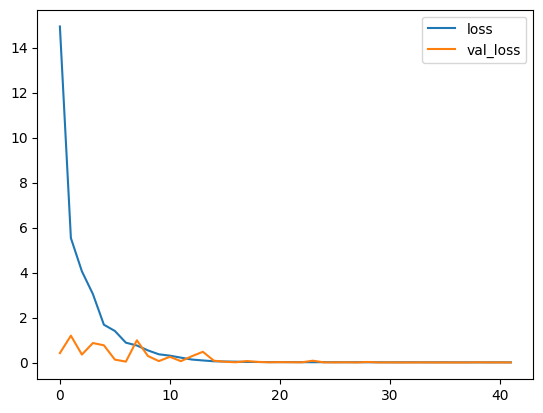

In [ ]:
#plotar a função de perda
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

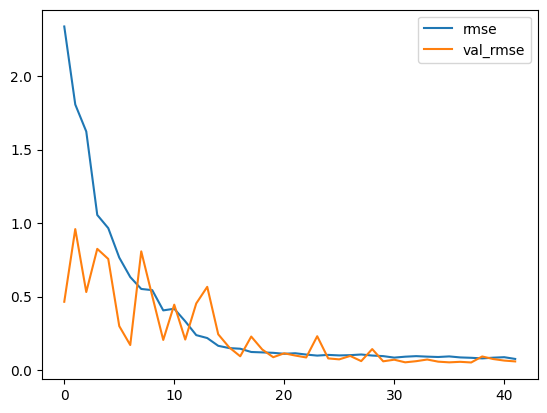

In [ ]:
#plotar metricas
plt.plot(r.history['rmse'], label='rmse')
plt.plot(r.history['val_rmse'], label='val_rmse')
plt.legend()

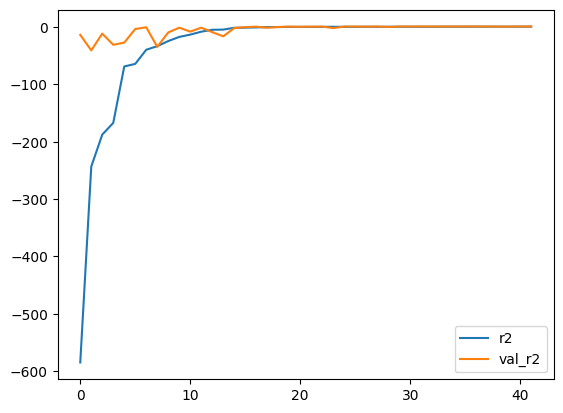

In [ ]:
#plotar variação r2
plt.plot(r.history['r2'], label='r2')
plt.plot(r.history['val_r2'], label='val_r2')
plt.legend()

In [ ]:
y_pred = model.predict(X_test).flatten()
mse  = mean_squared_error(Y_test, y_pred)
rmse = sqrt(mse)
r2   = r2_score(Y_test, y_pred)
print("mse     = ", mse)
print("rmse    = ", rmse)
print("r2      = ", r2)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
mse     =  0.004714574471009854
rmse    =  0.0686627589819245
r2      =  0.8442544193779574
